In [15]:
import numpy as np
import astroplan

import matplotlib.pyplot as plt
from astroplan.plots import plot_parallactic
from astroplan import Observer
from astroplan import FixedTarget
from astropy.time import Time


In [9]:
hr8799=FixedTarget.from_name("HR8799")

In [12]:
subaru = Observer.at_site("subaru")

In [27]:
time=[Time('2020-08-03 00:00:00'),Time('2020-08-03 01:00:00'),Time('2020-08-03 02:00:00'),Time('2020-08-03 03:00:00')]

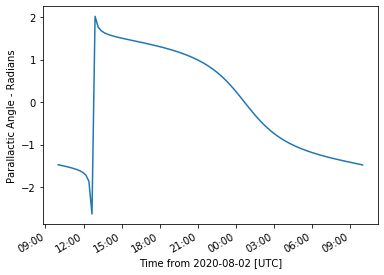

In [21]:
plot_parallactic(hr8799, subaru, time)
plt.savefig("hr8799.png")

In [41]:
t0=Time('2020-08-03 00:00:00')
dt=Time('2020-08-03 00:01:00')-t0
time=t0+dt*np.linspace(0,300,300)

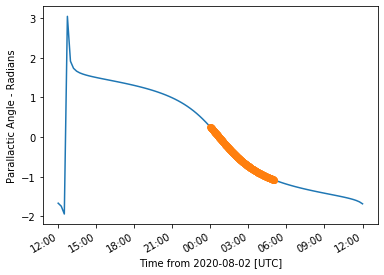

In [44]:
plot_parallactic(hr8799, subaru, Time('2020-08-03 00:00:00'))
plt.plot_date(time.plot_date,subaru.parallactic_angle(time,hr8799).value)

In [76]:
PA=np.array([306.1,231.5])/180*np.pi #e,d
sep = np.array([385.5, 694.3]) #mas

In [72]:
dh=Time('2020-08-01 01:00:00')-Time('2020-08-01 00:00:00')

t0=Time('2020-08-01 00:00:00')
dt=Time('2020-08-01 00:10:00')-t0 
timehst=t0+dt*np.linspace(0,6*6,42)
timeutc=timehst + 10*dh #UTC

In [73]:
dphie=np.mod(subaru.parallactic_angle(timeutc,hr8799).value-PA[0],2*np.pi)
dphid=np.mod(subaru.parallactic_angle(timeutc,hr8799).value-PA[1],2*np.pi)

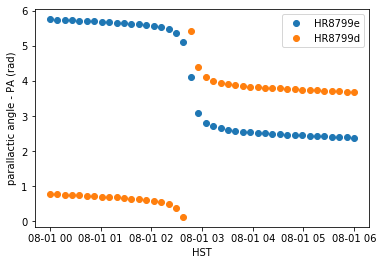

In [74]:
plt.plot_date(timehst.plot_date,dphie,label="HR8799e")
plt.plot_date(timehst.plot_date,dphid,label="HR8799d")
plt.legend()
plt.ylabel("parallactic angle - PA (rad)")
plt.xlabel("HST")
plt.savefig("hr8799pa.png")

In [ ]:
#HST=UTC-10

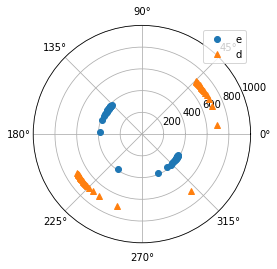

In [90]:
ax = plt.subplot(111, projection="polar")
ax.plot(dphie,sep[0]*np.ones(len(dphie)),"o",label="e")
ax.plot(dphid,sep[1]*np.ones(len(dphid)),"^",label="d")
ax.set_ylim(0,1000)
ax.set_ylabel("")
ax.legend()
plt.savefig("seppa.png")

In [91]:
test=FixedTarget.from_name("BD+09 4288")